# Multiclass Classification with Neural Networks

### Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Data

In [ ]:
# The data has already been sorted into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
n_samples = len(X)

In [ ]:
# Splitting data into three sets
X_train, y_train = X[:int(0.7*n_samples)], y[:int(0.7*n_samples)]
X_valid, y_valid = X[int(0.7*n_samples):int(0.85*n_samples)], y[int(0.7*n_samples):int(0.85*n_samples)]
X_test, y_test = X[int(0.85*n_samples):], y[int(0.85*n_samples):]

In [ ]:
# Checking if operation has been successfull
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((49000, 28, 28),
 (49000,),
 (10500, 28, 28),
 (10500,),
 (10500, 28, 28),
 (10500,))

In [ ]:
# Check the shape of a single example
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [ ]:
# Create a list, so we can index onto our training labels so they're human-readible
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

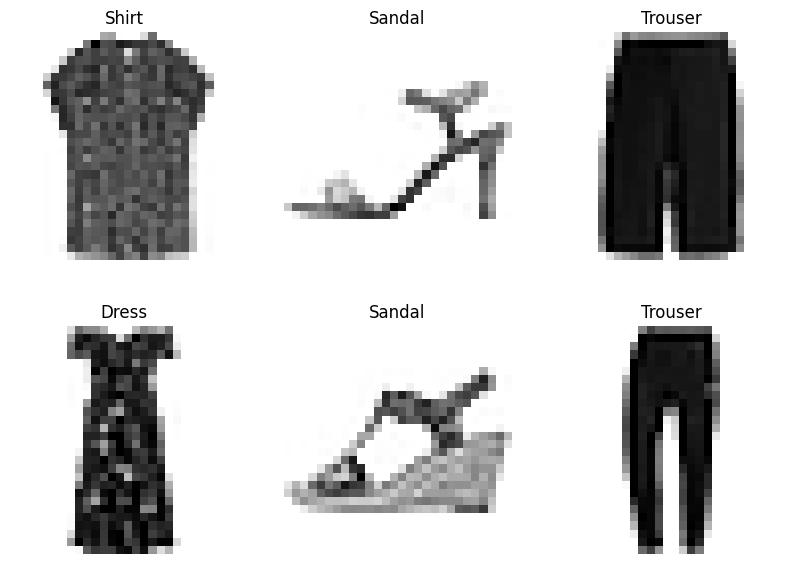

In [ ]:
# Display some examples
plt.figure(figsize=(10,7))
for i in range(6):
  ax = plt.subplot(2, 3, i + 1)
  random_idx = random.choice(range(len(X_train)))
  ax.imshow(X_train[random_idx], cmap=plt.cm.binary)
  plt.title(class_names[y_train[random_idx]])
  plt.axis(False)

### Models

In [ ]:
# Create function to plot loss and accuracy
def plot_curves(history, title=None):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy'] 
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
    ax1.plot(epochs, loss, label='training_loss')
    ax1.plot(epochs, val_loss, label='val_loss')
    ax1.title('Training and Validation Loss')
    ax1.xlabel('Epochs')
    ax1.ylabel('Loss')
    ax1.legend()

    ax2.plot(epochs, accuracy, label='training_accuracy')
    ax2.plot(epochs, val_accuracy, label='val_accuracy')
    ax2.title('Training and Validation Accuracy')
    ax2.xlabel('Epochs')
    ax2.ylabel('Accuracy')
    ax2.legend()

    if title:
        fig.suptitle(title)
    else:
        fig.suptitle('Training and Validation Metrics')

In [ ]:
# Build model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_non_norm = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1532/1532 [==============================] - 7s 3ms/step - loss: 2.3357 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0963
Epoch 2/10
1532/1532 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0963
Epoch 3/10
1532/1532 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0965
Epoch 4/10
1532/1532 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 5/10
1532/1532 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0965
Epoch 6/10
1532/1532 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1014
Epoch 7/10
1532/1532 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check min and max values of training data
X_train.min(), X_train.max()

(0, 255)

In [ ]:
# Knowing that I see that data should be normalized so the model can improve
X_train = X_train / X_train.max()
X_valid = X_valid / X_valid.max()
X_test = X_test / X_test.max()

In [ ]:
# Rebuild model to see improvment

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_norm = model2.fit(X_train,
                         y_train,
                         epochs=10,
                         validation_data=(X_valid, y_valid))

Epoch 1/10
1532/1532 [==============================] - 6s 3ms/step - loss: 1.2437 - accuracy: 0.5116 - val_loss: 0.9003 - val_accuracy: 0.7047
Epoch 2/10
1532/1532 [==============================] - 5s 3ms/step - loss: 0.8097 - accuracy: 0.7110 - val_loss: 0.7175 - val_accuracy: 0.7350
Epoch 3/10
1532/1532 [==============================] - 7s 4ms/step - loss: 0.6833 - accuracy: 0.7458 - val_loss: 0.6686 - val_accuracy: 0.7553
Epoch 4/10
1532/1532 [==============================] - 5s 3ms/step - loss: 0.6371 - accuracy: 0.7617 - val_loss: 0.6419 - val_accuracy: 0.7546
Epoch 5/10
1532/1532 [==============================] - 5s 3ms/step - loss: 0.6122 - accuracy: 0.7686 - val_loss: 0.6163 - val_accuracy: 0.7698
Epoch 6/10
1532/1532 [==============================] - 5s 3ms/step - loss: 0.5947 - accuracy: 0.7751 - val_loss: 0.6003 - val_accuracy: 0.7734
Epoch 7/10
1532/1532 [==============================] - 5s 4ms/step - loss: 0.5798 - accuracy: 0.7810 - val_loss: 0.5910 - val_accuracy:

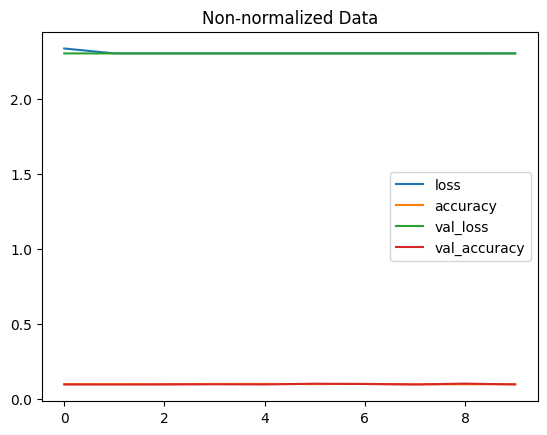

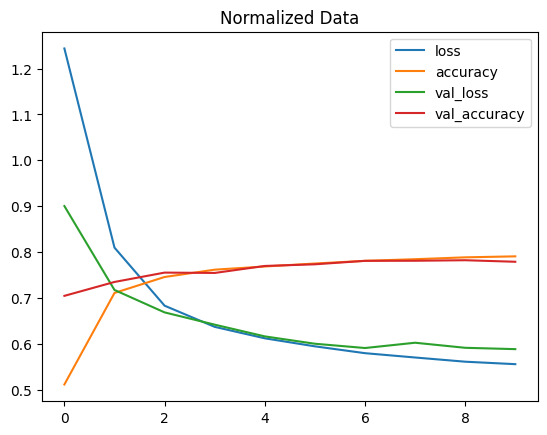

In [ ]:
# Plot data loss curves
pd.DataFrame(history_non_norm.history).plot(title='Non-normalized Data');
pd.DataFrame(history_norm.history).plot(title='Normalized Data');

#### After normalizing model gave far better predictions than before (which is shown on the plots above).

### Now I'll find best learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

history_lr = model3.fit(X_train,
                        y_train,
                        epochs=40,
                        validation_data=(X_valid, y_valid),
                        callbacks=[lr_scheduler])

Epoch 1/40
1532/1532 [==============================] - 7s 4ms/step - loss: 1.3544 - accuracy: 0.4376 - val_loss: 0.9514 - val_accuracy: 0.6308 - lr: 0.0010
Epoch 2/40
1532/1532 [==============================] - 5s 3ms/step - loss: 0.8564 - accuracy: 0.6710 - val_loss: 0.7959 - val_accuracy: 0.7034 - lr: 0.0011
Epoch 3/40
1532/1532 [==============================] - 5s 4ms/step - loss: 0.7694 - accuracy: 0.7104 - val_loss: 0.7485 - val_accuracy: 0.7286 - lr: 0.0013
Epoch 4/40
1532/1532 [==============================] - 5s 3ms/step - loss: 0.7310 - accuracy: 0.7293 - val_loss: 0.7265 - val_accuracy: 0.7405 - lr: 0.0014
Epoch 5/40
1532/1532 [==============================] - 6s 4ms/step - loss: 0.7100 - accuracy: 0.7397 - val_loss: 0.6971 - val_accuracy: 0.7512 - lr: 0.0016
Epoch 6/40
1532/1532 [==============================] - 5s 3ms/step - loss: 0.6905 - accuracy: 0.7503 - val_loss: 0.6747 - val_accuracy: 0.7546 - lr: 0.0018
Epoch 7/40
1532/1532 [==============================] - 5s

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

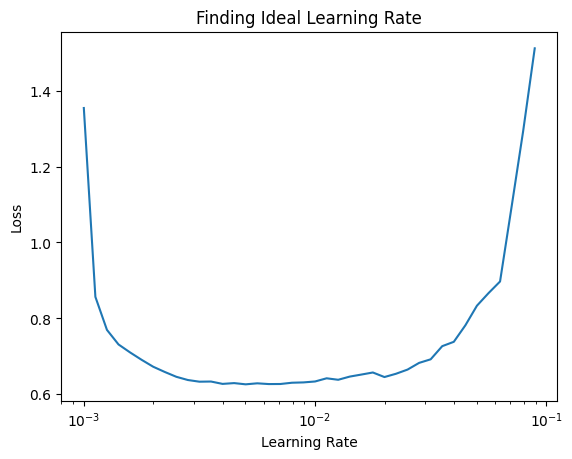

In [ ]:
# Plotting the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding Ideal Learning Rate')

**After analysis ideal learning rate is something about 0.0015. We can say that based on results of the model3.fit() and the learning rate plot (taking the minimum value of the loss and going back to the place where loss is still decreasing).**

In [ ]:
# Model with lr=0.0015
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
               metrics=['accuracy'])

history4 = model4.fit(X_train,
                      y_train,
                      epochs=20,
                      validation_data=(X_valid, y_valid))

Epoch 1/20
1532/1532 [==============================] - 6s 3ms/step - loss: 1.0570 - accuracy: 0.6327 - val_loss: 0.7383 - val_accuracy: 0.7474
Epoch 2/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.6794 - accuracy: 0.7733 - val_loss: 0.6408 - val_accuracy: 0.7809
Epoch 3/20
1532/1532 [==============================] - 9s 6ms/step - loss: 0.6127 - accuracy: 0.7909 - val_loss: 0.6028 - val_accuracy: 0.7929
Epoch 4/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.5815 - accuracy: 0.8002 - val_loss: 0.5855 - val_accuracy: 0.7957
Epoch 5/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.5658 - accuracy: 0.8041 - val_loss: 0.5850 - val_accuracy: 0.7984
Epoch 6/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.5511 - accuracy: 0.8094 - val_loss: 0.5646 - val_accuracy: 0.8023
Epoch 7/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.5449 - accuracy: 0.8120 - val_loss: 0.5663 - val_accuracy:

In [ ]:
model4.evaluate(X_test, y_test)

329/329 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.8065


[0.5646622180938721, 0.8064761757850647]

**Now I will try to improve model by changing layer parameters and amount of epochs**

In [ ]:
# Model with more hidden units
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
               metrics=['accuracy'])

history5 = model5.fit(X_train,
                      y_train,
                      epochs=20,
                      validation_data=(X_valid, y_valid))

Epoch 1/20
1532/1532 [==============================] - 6s 3ms/step - loss: 0.6787 - accuracy: 0.7563 - val_loss: 0.5513 - val_accuracy: 0.8000
Epoch 2/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.4632 - accuracy: 0.8370 - val_loss: 0.4750 - val_accuracy: 0.8371
Epoch 3/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.4336 - accuracy: 0.8467 - val_loss: 0.4370 - val_accuracy: 0.8472
Epoch 4/20
1532/1532 [==============================] - 5s 4ms/step - loss: 0.4159 - accuracy: 0.8531 - val_loss: 0.4396 - val_accuracy: 0.8460
Epoch 5/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.4065 - accuracy: 0.8542 - val_loss: 0.4230 - val_accuracy: 0.8492
Epoch 6/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.3973 - accuracy: 0.8583 - val_loss: 0.4345 - val_accuracy: 0.8471
Epoch 7/20
1532/1532 [==============================] - 5s 4ms/step - loss: 0.3915 - accuracy: 0.8608 - val_loss: 0.4272 - val_accuracy:

In [ ]:
model5.evaluate(X_test, y_test)

329/329 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.8466


[0.43589434027671814, 0.8465714454650879]

<Axes: title={'center': 'Model 5'}>

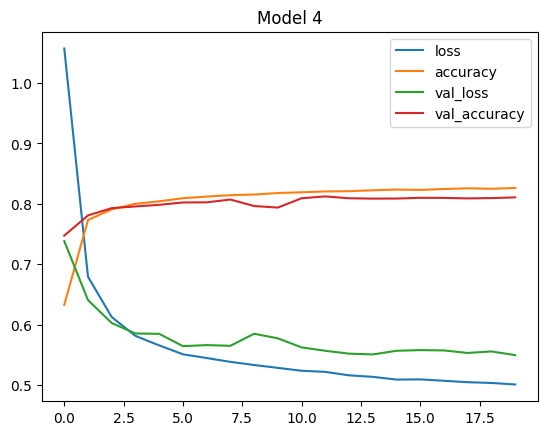

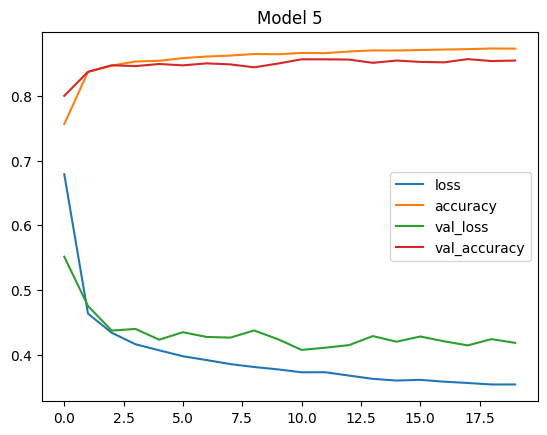

In [ ]:
# Plotting loss curves
pd.DataFrame(history4.history).plot(title='Model 4')
pd.DataFrame(history5.history).plot(title='Model 5')

In [ ]:
# Model with even more hidden units and more hidden layers
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
               metrics=['accuracy'])

history6 = model6.fit(X_train,
                      y_train,
                      epochs=20,
                      validation_data=(X_valid, y_valid))

Epoch 1/20
1532/1532 [==============================] - 10s 6ms/step - loss: 0.6204 - accuracy: 0.7748 - val_loss: 0.4627 - val_accuracy: 0.8276
Epoch 2/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.4558 - accuracy: 0.8368 - val_loss: 0.3994 - val_accuracy: 0.8548
Epoch 3/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.4186 - accuracy: 0.8496 - val_loss: 0.3910 - val_accuracy: 0.8613
Epoch 4/20
1532/1532 [==============================] - 9s 6ms/step - loss: 0.3934 - accuracy: 0.8580 - val_loss: 0.3730 - val_accuracy: 0.8655
Epoch 5/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.3810 - accuracy: 0.8604 - val_loss: 0.3560 - val_accuracy: 0.8660
Epoch 6/20
1532/1532 [==============================] - 9s 6ms/step - loss: 0.3684 - accuracy: 0.8669 - val_loss: 0.3530 - val_accuracy: 0.8744
Epoch 7/20
1532/1532 [==============================] - 9s 6ms/step - loss: 0.3543 - accuracy: 0.8712 - val_loss: 0.3461 - val_accuracy

In [ ]:
model6.evaluate(X_test, y_test)

329/329 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8783


[0.35960444808006287, 0.8782857060432434]

**Getting accuracy of the model at the rate of around 90% I decided that I'm fine with the results of the tuning**

## Evaluating model

After deciding that I'm satisfied with my model, I want to make more precise evaluation. I want to make confusion matrix and do some tests of my model on the images.

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
        y_true: Array of truth labels (must be same shape as y_pred).
        y_pred: Array of predicted labels (must be same shape as y_true).
        classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
        figsize: Size of output figure (default=(10, 10)).
        text_size: Size of output figure text (default=10).

    Returns:
        A labelled confusion matrix plot comparing y_true and y_pred.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)

    # Label the axes
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.xticks(np.arange(n_classes) + 0.5, labels=classes)
    plt.yticks(np.arange(n_classes) + 0.5, labels=classes)

    # Adjust the text size
    plt.setp(plt.gca().get_xticklabels(), fontsize=text_size)
    plt.setp(plt.gca().get_yticklabels(), fontsize=text_size)

    plt.show()

In [ ]:
# Make predictions
y_preds = model6.predict(X_test)

329/329 [==============================] - 1s 2ms/step


In [ ]:
# Convert all predictions probabilities into integers
y_preds = y_preds.argmax(axis=1)

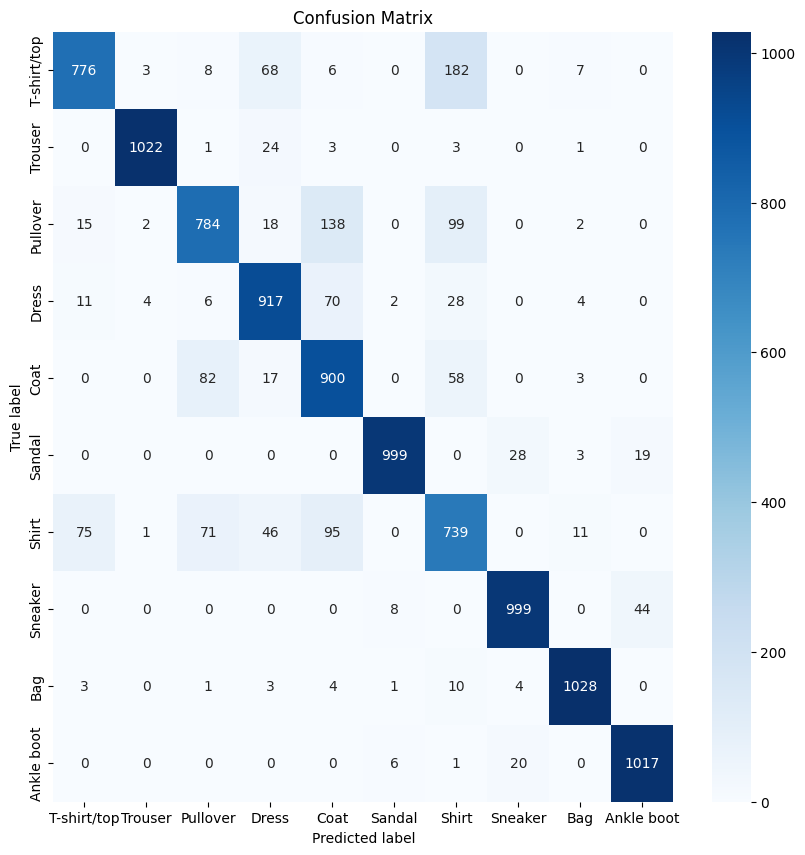

In [ ]:
make_confusion_matrix(y_test, y_preds, class_names)

In [ ]:
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})",
             color=color) # set the color to green or red

**Cell below can be used to check manually the quality of the model on some random images. Below the picture there is displayed prediction with level of confidence and true label.**

1/1 [==============================] - 0s 20ms/step


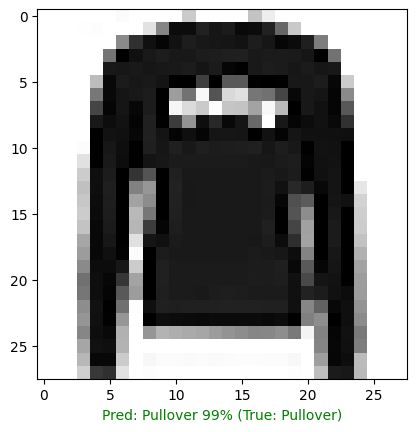

In [ ]:
plot_random_image(model=model6,
                  images=X_test,
                  true_labels=y_test,
                  classes=class_names)